In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def generate_random_normal_space(dim):
    # create n dimensional space by randomly generating n tuples of mean and std
    arr = np.empty((dim,), dtype=[('mean', '<f8'), ('std', '<f8')])
    arr['mean'] = np.random.uniform(0, 2, dim) - 1
    arr['std'] = np.random.uniform(0, 10, dim)
    return arr

In [5]:
def sample_normal_space(space_specs, n):
    # take n samples from a normal space defined by an array of mean and stds
    return np.vstack([np.random.normal(a['mean'], a['std'], n) for a in space_specs])

In [3]:
a = generate_random_normal_space(2)
a

array([(-0.04641221, 1.5694226 ), (-0.50619594, 4.88027194)],
      dtype=[('mean', '<f8'), ('std', '<f8')])

In [6]:
b = sample_normal_space(a, 3000)
b.shape

(2, 3000)

In [7]:
kernel = stats.gaussian_kde(b)

In [8]:
xmin = b[0].min()
xmax = b[0].max()
ymin = b[1].min()
ymax = b[1].max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

In [9]:
Z = np.reshape(kernel(positions).T, X.shape)

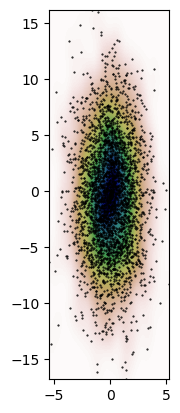

In [10]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(b[0], b[1], 'k.', markersize=1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [11]:
kernel.integrate_box([-10, -2.5], [10, 2.5])

0.3733707229392925

In [43]:
kernel.integrate_gaussian(a['mean'], np.diag(a['std']))

0.023555222644360108

In [12]:
d1 = generate_random_normal_space(1)
d1

array([(0.75115634, 5.42617077)], dtype=[('mean', '<f8'), ('std', '<f8')])

In [13]:
samples = np.random.normal(d1['mean'], d1['std'], 3000)

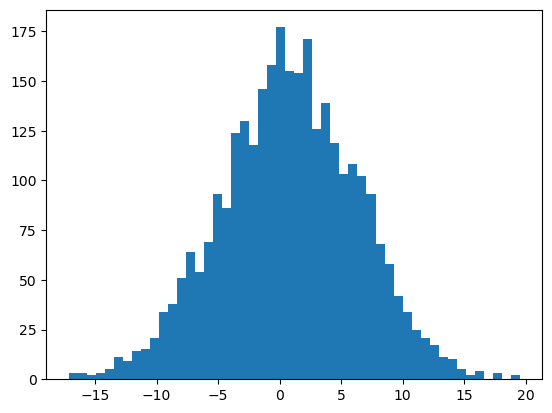

In [14]:
plt.hist(samples, 50)
plt.show()

In [15]:
k = stats.gaussian_kde(samples)

In [16]:
x = np.arange(-20, 20, 1)
z = k(x)

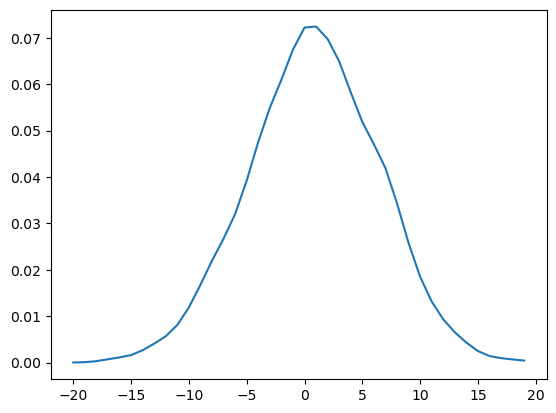

In [18]:
plt.plot(x, z)

In [19]:
k.integrate_box_1d(-20, 20)

0.9998204556874047

In [20]:
np.sum(z)

0.99970111544461

In [21]:
diff = np.abs(z - 1 / 40)
diff

array([0.02499195, 0.02493224, 0.02470796, 0.02429808, 0.0238953 ,
       0.02339608, 0.02235498, 0.0209431 , 0.01933794, 0.01690268,
       0.01312864, 0.00824772, 0.00304982, 0.00170492, 0.00702659,
       0.01421412, 0.02255009, 0.0299059 , 0.035957  , 0.04244563,
       0.04719249, 0.04743696, 0.04474024, 0.03990198, 0.03323736,
       0.02686087, 0.02206061, 0.01691338, 0.0093293 , 0.00075905,
       0.0064975 , 0.01185488, 0.0156886 , 0.01848969, 0.02071243,
       0.02252311, 0.02360267, 0.02405543, 0.02433905, 0.0245855 ])

In [22]:
np.sum(diff)

0.8847718235218576

In [23]:
u_samples = np.random.uniform(-20, 20, 3000)
k2 = stats.gaussian_kde(u_samples)

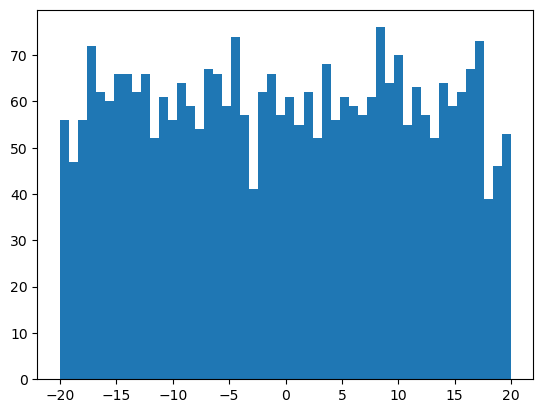

In [26]:
plt.hist(u_samples, 50)
plt.show()

In [27]:
x2 = np.arange(-20, 20, 0.5)
z2 = k2(x2)

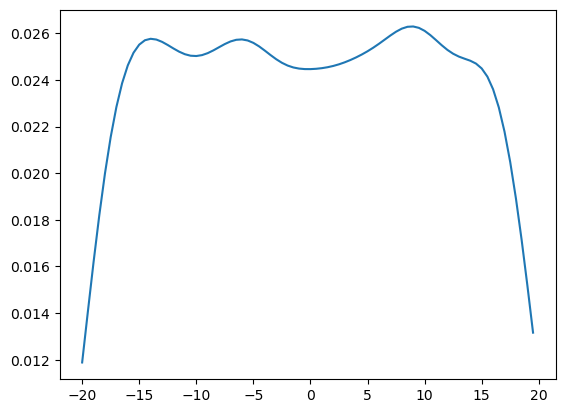

In [28]:
plt.plot(x2, z2)
plt.show()

In [29]:
np.sum(z2 * 0.5)

0.9583668488201721

In [30]:
k2.integrate_box_1d(-20, 20)

0.9583486862228032

In [32]:
np.sum(np.abs(z2 - 1/40) * 0.5)

0.06448549001498566

In [ ]:
# integrate(k(x) - f(x))

In [5]:
import sys

sys.path.append('..')

from util.participant_stream import ParticipantStream

In [11]:
stream = ParticipantStream(seed=3098)

In [13]:
stream.generate_participants(10)

[{'party': 'Republican',
  'age': 67,
  'gender': 'M',
  'arrival_time': 67,
  'departure_time': 74},
 {'party': 'Democrat',
  'age': 38,
  'gender': 'M',
  'arrival_time': 9,
  'departure_time': 44},
 {'party': 'Republican',
  'age': 45,
  'gender': 'F',
  'arrival_time': 15,
  'departure_time': 27},
 {'party': 'Independent',
  'age': 49,
  'gender': 'M',
  'arrival_time': 23,
  'departure_time': 76},
 {'party': 'Democrat',
  'age': 31,
  'gender': 'M',
  'arrival_time': 16,
  'departure_time': 91},
 {'party': 'Democrat',
  'age': 39,
  'gender': 'F',
  'arrival_time': 11,
  'departure_time': 15},
 {'party': 'Republican',
  'age': 26,
  'gender': 'M',
  'arrival_time': 19,
  'departure_time': 113},
 {'party': 'Independent',
  'age': 30,
  'gender': 'M',
  'arrival_time': 27,
  'departure_time': 28},
 {'party': 'Independent',
  'age': 58,
  'gender': 'F',
  'arrival_time': 17,
  'departure_time': 39},
 {'party': 'Republican',
  'age': 73,
  'gender': 'F',
  'arrival_time': 20,
  'depar

#### Study 1
 - dyads  
 - one republican, one democrat  
 - uniformly sample over age and gender, balanced so that we get an even number of republicans at each age/gender combo, etc.
 - assign everyone who comes, with no leftovers if possible
 - a group of 3 as a backup to account for odd numbers is preferable to having leftovers

In [30]:
# Study 1
def encode_party(p1, p2):
    if (p1 == 'Republican' and p2 == 'Democrat') or (p1 == 'Democrat' and p2 == 'Republican'):
        return 1
    return 0

def encode_gender(p1, p2):
    # M = 0, F = 1
    return int(p1 == 'F') + int(p2 == 'F')

gender_pdf = 1/3
age_pdf = 1 / (80 - 19)

def joint_pdf(party):
    return party * gender_pdf * age_pdf * age_pdf

v_joint_pdf = np.vectorize(joint_pdf, otypes=[float])

In [15]:
pool = stream.generate_participants(1000)
shuffled = np.array_split(np.random.permutation(pool), 500)

In [24]:
samples = np.array([[encode_party(p[0]['party'], p[1]['party']), p[0]['age'], p[1]['age'], encode_gender(p[0]['gender'], p[1]['gender'])] for p in shuffled])
samples

array([[ 0, 36, 48,  1],
       [ 1, 48, 25,  1],
       [ 0, 29, 43,  1],
       ...,
       [ 0, 35, 32,  0],
       [ 0, 42, 50,  0],
       [ 0, 54, 21,  1]])

In [26]:
x = samples.transpose()
x

array([[ 0,  1,  0, ...,  0,  0,  0],
       [36, 48, 29, ..., 35, 42, 54],
       [48, 25, 43, ..., 32, 50, 21],
       [ 1,  1,  1, ...,  0,  0,  1]])

In [27]:
k = stats.gaussian_kde(x)

In [31]:
diff = np.abs(np.subtract(k(x), v_joint_pdf(samples[:,0])))
diff


array([4.76315757e-04, 2.62984014e-05, 3.50785324e-04, 4.16506775e-04,
       4.72319001e-04, 2.48151271e-05, 4.55398715e-04, 2.80553933e-04,
       3.43489689e-04, 1.27542067e-04, 1.33197557e-04, 4.29103160e-04,
       1.34702327e-04, 1.49810973e-04, 2.43503224e-04, 5.52022030e-05,
       5.52666098e-05, 2.08567010e-04, 1.51336693e-04, 3.93125674e-05,
       4.57868562e-04, 1.41860218e-04, 8.47954691e-05, 4.74976137e-04,
       2.64178032e-04, 1.83806965e-04, 4.15192291e-04, 1.55795752e-04,
       2.14262775e-06, 3.37447598e-05, 6.17005716e-05, 9.85083581e-05,
       5.04664948e-05, 3.36301914e-04, 2.45160253e-04, 3.43051821e-05,
       4.71279729e-04, 2.32978694e-04, 8.06392849e-05, 3.06740033e-04,
       7.44855234e-06, 1.34646399e-04, 2.69751768e-04, 5.06259163e-05,
       2.54062941e-04, 6.23891454e-05, 8.61667171e-05, 1.08951302e-04,
       2.41743418e-04, 2.79669212e-04, 2.55296592e-04, 2.19224863e-05,
       2.17583814e-04, 3.65274690e-04, 3.08235047e-04, 1.55731412e-04,
      

In [32]:
np.sum(diff)

0.09125344376131746